In [1]:
import matplotlib.pyplot as plt
import tools.dataTools as dt
from constants import Constants
import figure_params
import os
import matplotlib.pyplot as plt
from pyaldata import *
import pickle
from tqdm.auto import tqdm
from textwrap import wrap
import pyaldata as pyal
import pandas as pd

figure_params.set_rc_params()
figure_params.setup_directories()

SUBFIG_DIR = Constants.FIG_FOLDER + 'figS11_manifold_overlap/'
if not os.path.exists(SUBFIG_DIR):
    os.makedirs(SUBFIG_DIR)

#run simulations for figure, will take a while to run
import subprocess
os.chdir(Constants.PROJ_DIR)
# subprocess.run(["bash", "simulation/fig_simulations/fig4_sims.sh"]) #uncomment code to make datasets if not made yet

import warnings
warnings.filterwarnings("ignore")

In [2]:
seeds = Constants.SEEDS
reps  = Constants.UNIS


#### Calculate comparison measures

In [3]:
perturbation = 'rotation'
pert_param = 10.0 
pert_set = 'v1'
redo = False

for sim_set in ['uni_rad', 'uni_onehot']:
    fname = Constants.PROCESSED_DATA_FOLDER + sim_set + '/'+ 'manifold_overlap.pickle'
    if os.path.isfile(fname) & (not redo):
        with open(fname, 'rb') as f:
            measures_df = pickle.load(f)
    else:
        #calculate manifold overlap
        datafile = 'uni_10.0' + Constants.SIM_SET_DATA[sim_set]
        rows_list = []
        for seed in tqdm(seeds):
            for rep in reps:
                learning_datafile = rep + Constants.SIM_SET_DATA[sim_set]

                #get simulation data
                ## before adapt
                prep_exec_df_init_learning = dt.get_pyaldata(sim_set, seed, rep, epoch_fun = Constants.prep_exec_epoch, 
                    subtract_mean=False, datafile = learning_datafile)
                prep_exec_df_init_rates_learning = pyal.concat_trials(prep_exec_df_init_learning, 'MCx_rates')

                ## after adapt
                prep_exec_df_learning = dt.get_pyaldata(sim_set, seed, rep, perturbation, pert_param, pert_set, epoch_fun = Constants.prep_exec_epoch, 
                    subtract_mean=False, datafile = learning_datafile)
                prep_exec_df_rates_learning = pyal.concat_trials(prep_exec_df_learning, 'MCx_rates')

                #calc manifold overlap
                prep_exec_manifold_overlap_learning = dt.manifold_overlap(prep_exec_df_init_rates_learning, prep_exec_df_rates_learning, pca_dims=Constants.PCA_DIMS)

                prep_exec_manifold_overlap_learning_control = dt.manifold_overlap_control(prep_exec_df_init_rates_learning, pca_dims=Constants.PCA_DIMS)

                temp = {
                    'seed': seed,
                    'repertoire': rep,
                    'perturbation': perturbation,
                    'pert_param': pert_param,
                    'pert_set': pert_set,
                    'prep_exec_manifold_overlap_learning': prep_exec_manifold_overlap_learning,
                    'prep_exec_manifold_overlap_learning_control': prep_exec_manifold_overlap_learning_control,
                }
                rows_list.append(temp)

        measures_df = pd.DataFrame(rows_list)
        with open(fname, 'wb') as f:
            pickle.dump(measures_df, f)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

#### Manifold overlap

0.001953125
0.001953125
0.16015625


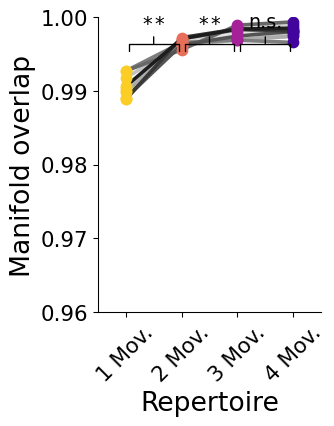

In [4]:
sim_set = 'uni_rad'
fname = Constants.PROCESSED_DATA_FOLDER + sim_set + '/'+ 'manifold_overlap.pickle'
with open(fname, 'rb') as f:
    measures_df = pickle.load(f)

g = dt.compare_measure(measures_df, 'prep_exec_manifold_overlap_learning', reps, stats_alternative="two-sided")
g.set_ylim([0.96,1.0])
g.set_ylabel("\n".join(wrap('Manifold overlap')))
plt.savefig(SUBFIG_DIR + 'manifold_overlap' + sim_set + '.pdf', format = 'pdf', bbox_inches = 'tight')

0.001953125
0.083984375
0.431640625


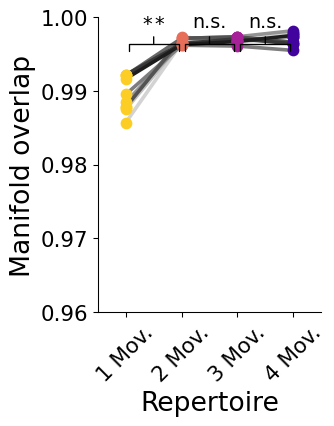

In [5]:
sim_set = 'uni_onehot'
fname = Constants.PROCESSED_DATA_FOLDER + sim_set + '/'+ 'manifold_overlap.pickle'
with open(fname, 'rb') as f:
    measures_df = pickle.load(f)

g = dt.compare_measure(measures_df, 'prep_exec_manifold_overlap_learning', reps, stats_alternative="two-sided")
g.set_ylim([0.96,1.0])
g.set_ylabel("\n".join(wrap('Manifold overlap')))
plt.savefig(SUBFIG_DIR + 'manifold_overlap' + sim_set + '.pdf', format = 'pdf', bbox_inches = 'tight')